We start training different models and evaluate results

## Loading Data

In [1]:
# Import libraries needed
import pandas as pd


In [2]:
PATH_INPUT_CSV = './data_train_merged.csv'


In [3]:
# We read Excel with Historic data of landslides and other events
training = pd.read_csv(PATH_INPUT_CSV,index_col=0)


In [4]:
len(training.landslide_id.unique())

8445

## Preprocessing


We process features and generate training data and test data

In [5]:
# Import skleran preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [37]:
df = training

In [7]:
list(training.columns)

['landslide_id',
 'precipitation_mm_last_7_days',
 'latitude',
 'longitude',
 'landslide',
 'event_date',
 'rock_geo',
 'rock_period',
 'fis_nomr',
 'rock_type',
 'soil_rec_symbol',
 'soil_rec_mat_origin',
 'soil_rec_sew_class',
 'soil_rec_tex_sup',
 'soil_rec_c_tex_sup',
 'soil_rec_tex_sub',
 'soil_rec_c__tex_sub',
 'soil_rec_risk_eros',
 'soil_tax',
 'soil_use',
 'satellite',
 'elevation_1',
 'elevation_6',
 'elevation_11',
 'elevation_16',
 'elevation_21',
 'elevation_2',
 'elevation_7',
 'elevation_12',
 'elevation_17',
 'elevation_22',
 'elevation_3',
 'elevation_8',
 'elevation_13',
 'elevation_18',
 'elevation_23',
 'elevation_4',
 'elevation_9',
 'elevation_14',
 'elevation_19',
 'elevation_24',
 'elevation_5',
 'elevation_10',
 'elevation_15',
 'elevation_20',
 'elevation_25',
 'slope_1',
 'slope_6',
 'slope_11',
 'slope_16',
 'slope_21',
 'slope_2',
 'slope_7',
 'slope_12',
 'slope_17',
 'slope_22',
 'slope_3',
 'slope_8',
 'slope_13',
 'slope_18',
 'slope_23',
 'slope_4',
 '

In [38]:
# We use a label encoder for each of the columns of categories
features_string = [ 
 'soil_tax',
 'satellite',
 'soil_rec_symbol',
 'soil_rec_mat_origin',
 'soil_rec_sew_class',
 'soil_rec_tex_sup',
 'soil_rec_c_tex_sup',
 'soil_rec_tex_sub',
 'soil_rec_c__tex_sub',
 'soil_rec_risk_eros',
 'fis_nomr',
 'soil_use',
 'rock_geo',
 'rock_type',
 'rock_period']
for feature in features_string:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])

In [39]:
from sklearn.preprocessing import StandardScaler
  
features_scaler = [ 
 # #     'elevation_1',
# #  'elevation_6',
# #  'elevation_11',
# #  'elevation_16',
# #  'elevation_21',
# #  'elevation_2',
# #  'elevation_7',
# #  'elevation_12',
# #  'elevation_17',
# #  'elevation_22',
 'elevation_3',
 'elevation_8',
 'elevation_13',
 'elevation_18',
 'elevation_23',
# #  'elevation_4',
# #  'elevation_9',
# #  'elevation_14',
# #  'elevation_19',
# #  'elevation_24',
# #  'elevation_5',
# #  'elevation_10',
# #  'elevation_15',
# #  'elevation_20',
# #  'elevation_25',
# #  'slope_1',
# #  'slope_6',
# #  'slope_11',
# #  'slope_16',
# #  'slope_21',
# #  'slope_2',
# #  'slope_7',
# #  'slope_12',
# #  'slope_17',
# #  'slope_22',
 'slope_3',
 'slope_8',
 'slope_13',
 'slope_18',
 'slope_23',
# #  'slope_4',
# #  'slope_9',
# #  'slope_14',
# #  'slope_19',
# #  'slope_24',
# #  'slope_5',
# #  'slope_10',
# #  'slope_15',
# #  'slope_20',
# #  'slope_25',
# #  'aspect_1',
# #  'aspect_6',
# #  'aspect_11',
# #  'aspect_16',
# #  'aspect_21',
# #  'aspect_2',
# #  'aspect_7',
# #  'aspect_12',
# #  'aspect_17',
# #  'aspect_22',
 'aspect_3',
 'aspect_8',
 'aspect_13',
 'aspect_18',
 'aspect_23',
# #  'aspect_4',
# #  'aspect_9',
# #  'aspect_14',
# #  'aspect_19',
# #  'aspect_24',
# #  'aspect_5',
# #  'aspect_10',
# #  'aspect_15',
# #  'aspect_20',
# #  'aspect_25',
# #  'placurv_1',
# #  'placurv_6',
# #  'placurv_11',
# #  'placurv_16',
# #  'placurv_21',
# #  'placurv_2',
# #  'placurv_7',
# #  'placurv_12',
# #  'placurv_17',
# #  'placurv_22',
 'placurv_3',
 'placurv_8',
 'placurv_13',
 'placurv_18',
 'placurv_23',
# #  'placurv_4',
# #  'placurv_9',
# #  'placurv_14',
# #  'placurv_19',
# #  'placurv_24',
# #  'placurv_5',
# #  'placurv_10',
# #  'placurv_15',
# #  'placurv_20',
# #  'placurv_25',
# #  'procurv_1',
# #  'procurv_6',
# #  'procurv_11',
# #  'procurv_16',
# #  'procurv_21',
# #  'procurv_2',
# #  'procurv_7',
# #  'procurv_12',
# #  'procurv_17',
# #  'procurv_22',
 'procurv_3',
 'procurv_8',
 'procurv_13',
 'procurv_18',
 'procurv_23',
# #  'procurv_4',
# #  'procurv_9',
# #  'procurv_14',
# #  'procurv_19',
# #  'procurv_24',
# #  'procurv_5',
# #  'procurv_10',
# #  'procurv_15',
# #  'procurv_20',
# #  'procurv_25',
# #  'latitude',
# #  'longitude',
# # 'event_date',
# #  'departamento',
# #  'municipio',
# #  'incident',
# #  'image_name'
 'precipitation_mm_last_7_days']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[features_scaler])
df[features_scaler] = scaler.transform(df[features_scaler])

In [40]:
features = [
# #     'elevation_1',
# #  'elevation_6',
# #  'elevation_11',
# #  'elevation_16',
# #  'elevation_21',
# #  'elevation_2',
# #  'elevation_7',
# #  'elevation_12',
# #  'elevation_17',
# #  'elevation_22',
 'elevation_3',
 'elevation_8',
 'elevation_13',
 'elevation_18',
 'elevation_23',
# #  'elevation_4',
# #  'elevation_9',
# #  'elevation_14',
# #  'elevation_19',
# #  'elevation_24',
# #  'elevation_5',
# #  'elevation_10',
# #  'elevation_15',
# #  'elevation_20',
# #  'elevation_25',
# #  'slope_1',
# #  'slope_6',
# #  'slope_11',
# #  'slope_16',
# #  'slope_21',
# #  'slope_2',
# #  'slope_7',
# #  'slope_12',
# #  'slope_17',
# #  'slope_22',
 'slope_3',
 'slope_8',
 'slope_13',
 'slope_18',
 'slope_23',
# #  'slope_4',
# #  'slope_9',
# #  'slope_14',
# #  'slope_19',
# #  'slope_24',
# #  'slope_5',
# #  'slope_10',
# #  'slope_15',
# #  'slope_20',
# #  'slope_25',
# #  'aspect_1',
# #  'aspect_6',
# #  'aspect_11',
# #  'aspect_16',
# #  'aspect_21',
# #  'aspect_2',
# #  'aspect_7',
# #  'aspect_12',
# #  'aspect_17',
# #  'aspect_22',
 'aspect_3',
 'aspect_8',
 'aspect_13',
 'aspect_18',
 'aspect_23',
# #  'aspect_4',
# #  'aspect_9',
# #  'aspect_14',
# #  'aspect_19',
# #  'aspect_24',
# #  'aspect_5',
# #  'aspect_10',
# #  'aspect_15',
# #  'aspect_20',
# #  'aspect_25',
# #  'placurv_1',
# #  'placurv_6',
# #  'placurv_11',
# #  'placurv_16',
# #  'placurv_21',
# #  'placurv_2',
# #  'placurv_7',
# #  'placurv_12',
# #  'placurv_17',
# #  'placurv_22',
 'placurv_3',
 'placurv_8',
 'placurv_13',
 'placurv_18',
 'placurv_23',
# #  'placurv_4',
# #  'placurv_9',
# #  'placurv_14',
# #  'placurv_19',
# #  'placurv_24',
# #  'placurv_5',
# #  'placurv_10',
# #  'placurv_15',
# #  'placurv_20',
# #  'placurv_25',
# #  'procurv_1',
# #  'procurv_6',
# #  'procurv_11',
# #  'procurv_16',
# #  'procurv_21',
# #  'procurv_2',
# #  'procurv_7',
# #  'procurv_12',
# #  'procurv_17',
# #  'procurv_22',
 'procurv_3',
 'procurv_8',
 'procurv_13',
 'procurv_18',
 'procurv_23',
# #  'procurv_4',
# #  'procurv_9',
# #  'procurv_14',
# #  'procurv_19',
# #  'procurv_24',
# #  'procurv_5',
# #  'procurv_10',
# #  'procurv_15',
# #  'procurv_20',
# #  'procurv_25',
# #  'latitude',
# #  'longitude',
# # 'event_date',
# #  'departamento',
# #  'municipio',
# #  'incident',
# #  'image_name'
 'precipitation_mm_last_7_days',
#  'satellite',
 'soil_tax',
 'soil_rec_symbol',
 'soil_rec_mat_origin',
 'soil_rec_sew_class',
 'soil_rec_tex_sup',
 'soil_rec_c_tex_sup',
 'soil_rec_tex_sub',
 'soil_rec_c__tex_sub',
 'soil_rec_risk_eros',
 'fis_nomr',
 'soil_use',
 'rock_geo',
 'rock_type',
 'rock_period',
]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['landslide'], test_size=0.3,random_state=0)


In [42]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [43]:
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 4480, 1: 2129})
Testing target statistics: Counter({0: 1929, 1: 904})


In [44]:
over_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 2129, 1: 2129})
Testing target statistics: Counter({0: 1929, 1: 904})


In [45]:
len(training)

9442

## Start Training different models

In [46]:
from sklearn.metrics import roc_auc_score,accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,cross_validate


In [47]:
def train_with_model_train_test_method(clf, model, X_train, y_train, X_test,y_test, using_oversample=False):
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    prediction_prob = clf.predict_proba(X_test)
    accuracy_score_model = accuracy_score(y_test, prediction)
    roc_auc_score_model = roc_auc_score(y_test,prediction_prob[:,1], labels=[1,0])
    print("Model {} {}".format(model, 'using oversample' if using_oversample else ''))
    print("Scores")
    print("Accuracy score: {}".format( str(accuracy_score_model)))
    print("RocAuc score: {}".format( str(roc_auc_score_model)))
    print("Confusion Matrix")
    confusion_matrix_model = confusion_matrix(y_test, prediction, labels=[1,0])
    print((confusion_matrix_model))
    target_names = ['non_landslide','landslide']
    print("Classification Report")
    print((classification_report(y_test, prediction, target_names=target_names)))
    print(" Roc Curve")
    fpr, tpr, _ = roc_curve(y_test,  prediction_prob[::,1],pos_label=1)
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
  
    try:
        print("Feature Importance")
        importances = clf.feature_importances_
        feature_importances_dict = dict()
        for x in range(len(importances)):
            feature_importances_dict[features[x]] = round(importances[x]*100,2)
        feature_importances_dict_sorted = {k: v for k, v in sorted(feature_importances_dict.items(), key=lambda item: item[1],reverse=True)}
        print("\tPlace\tFeature\t%")
        index = 1
        for key in feature_importances_dict_sorted.keys():
            if(feature_importances_dict[key]>0.5):
                print("\t{}\t{}\t{}".format(index,key,feature_importances_dict[key]))
                index +=1
    except:
        pass
    return accuracy_score_model,roc_auc_score_model


In [48]:
def train_with_model_cross_validation_method(clf,model,training_df,features,using_oversample=False):
    print("Model {} {}".format(model, 'using oversample' if using_oversample else ''))
    print("Cross Validation")
    k_folds = KFold(n_splits=5, shuffle=True,random_state=0)
    kfold = 1
    X = training_df.loc[:, features]
    y = training_df.loc[:,'landslide']
    # for train_index, test_index in kf5.split(training_df):
    #     X_train = training_df.iloc[train_index].loc[:, features]
    #     X_test = training_df.iloc[test_index][features]
    #     y_train = training_df.iloc[train_index].loc[:,'landslide']
    #     if(using_oversample):
    #         over_sampler = RandomOverSampler(random_state=0)
    #         X_train, y_train = over_sampler.fit_resample(X_train, y_train)
    #     y_test = training_df.loc[test_index]['landslide']
    scores = cross_validate(clf, X, y, cv = k_folds,scoring=['roc_auc','precision_macro', 'recall_macro'],return_estimator=True)
    for idx,estimator in enumerate(scores['estimator']):
        print("Features sorted by their score for estimator {}:".format(idx))
        feature_importances = pd.DataFrame(estimator.feature_importances_,
                                        index = features,
                                            columns=['importance']).sort_values('importance', ascending=False)
        print(feature_importances)
    print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("Number of CV Scores used in Average: ", len(scores))

### Train With RandomForestClassifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=0)
model = "RandomForest"


Model RandomForest 
Scores
Accuracy score: 0.8002117896223085
RocAuc score: 0.8943876748480911
Confusion Matrix
[[ 599  279]
 [ 287 1668]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.86      0.85      0.85      1955
    landslide       0.68      0.68      0.68       878

     accuracy                           0.80      2833
    macro avg       0.77      0.77      0.77      2833
 weighted avg       0.80      0.80      0.80      2833

 Roc Curve


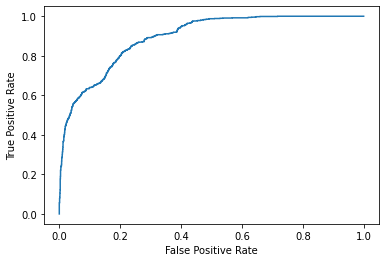

Feature Importance
	Place	Feature	%
	1	precipitation_mm_last_7_days	8.34
	2	elevation_20	5.73
	3	elevation_19	5.07
	4	elevation_24	4.85
	5	elevation_8	4.84
	6	elevation_18	4.63
	7	elevation_10	4.17
	8	elevation_17	3.88
	9	elevation_15	3.66
	10	elevation_23	3.41
	11	elevation_11	3.23
	12	elevation_3	3.21
	13	elevation_9	3.16
	14	elevation_12	3.09
	15	elevation_4	3.09
	16	elevation_1	2.9
	17	elevation_5	2.72
	18	elevation_6	2.71
	19	elevation_21	2.3
	20	elevation_7	2.23
	21	elevation_14	2.1
	22	elevation_13	1.88
	23	soil_rec_tex_sup	1.6
	24	elevation_2	1.57
	25	elevation_22	1.57
	26	elevation_25	1.35
	27	elevation_16	1.28
	28	soil_tax	0.92
	29	soil_rec_tex_sub	0.74
	30	soil_rec_c__tex_sub	0.58
	31	rock_geo	0.56
	32	soil_rec_mat_origin	0.54


In [118]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Model RandomForest using overfit
Scores
Accuracy score: 0.7952700317684434
RocAuc score: 0.8992408927520696
Confusion Matrix
[[ 778  100]
 [ 480 1475]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.94      0.75      0.84      1955
    landslide       0.62      0.89      0.73       878

     accuracy                           0.80      2833
    macro avg       0.78      0.82      0.78      2833
 weighted avg       0.84      0.80      0.80      2833

 Roc Curve


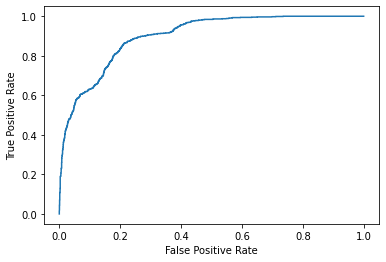

Feature Importance
	Place	Feature	%
	1	precipitation_mm_last_7_days	7.61
	2	elevation_10	7.56
	3	elevation_20	6.45
	4	elevation_15	5.45
	5	elevation_5	4.59
	6	elevation_24	4.26
	7	elevation_22	4.1
	8	elevation_9	4.04
	9	elevation_17	3.96
	10	elevation_8	3.94
	11	elevation_12	3.87
	12	elevation_19	3.61
	13	elevation_23	2.87
	14	elevation_6	2.72
	15	elevation_18	2.5
	16	elevation_3	2.47
	17	elevation_14	2.33
	18	elevation_13	2.26
	19	elevation_4	2.17
	20	elevation_11	1.99
	21	elevation_1	1.9
	22	elevation_21	1.81
	23	elevation_7	1.81
	24	soil_rec_tex_sup	1.81
	25	elevation_16	1.32
	26	elevation_25	1.29
	27	elevation_2	1.19
	28	soil_rec_tex_sub	0.87
	29	soil_tax	0.67
	30	soil_rec_c_tex_sup	0.58


In [120]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_res, y_train=y_res, X_test=X_test, y_test=y_test,using_oversample=True)

### Train with GradientBoostingClassifier

In [250]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier( random_state=0)
model = "GradientBoost"


Model GradientBoost 
Scores
Accuracy score: 0.8672785033533357
RocAuc score: 0.930994744909377
Confusion Matrix
[[ 725  214]
 [ 162 1732]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.89      0.91      0.90      1894
    landslide       0.82      0.77      0.79       939

     accuracy                           0.87      2833
    macro avg       0.85      0.84      0.85      2833
 weighted avg       0.87      0.87      0.87      2833

 Roc Curve


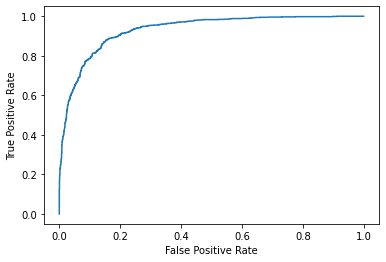

Feature Importance
	Place	Feature	%
	1	precipitation_mm_last_7_days	37.12
	2	soil_rec_tex_sup	12.2
	3	rock_type	10.82
	4	fis_nomr	10.76
	5	soil_rec_tex_sub	6.19
	6	rock_geo	5.82
	7	soil_rec_mat_origin	4.68
	8	rock_period	4.4
	9	soil_rec_symbol	2.49
	10	soil_tax	2.09
	11	soil_rec_risk_eros	1.46
	12	soil_use	0.8
	13	soil_rec_c_tex_sup	0.56


(0.8672785033533357, 0.930994744909377)

In [251]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Model GradientBoost using oversample
Scores
Accuracy score: 0.8524532297917402
RocAuc score: 0.9305308619900521
Confusion Matrix
[[ 827  112]
 [ 306 1588]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.93      0.84      0.88      1894
    landslide       0.73      0.88      0.80       939

     accuracy                           0.85      2833
    macro avg       0.83      0.86      0.84      2833
 weighted avg       0.87      0.85      0.86      2833

 Roc Curve


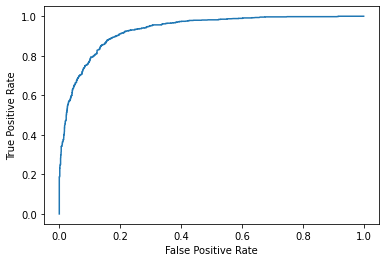

Feature Importance
	Place	Feature	%
	1	precipitation_mm_last_7_days	39.49
	2	soil_rec_tex_sup	15.83
	3	fis_nomr	13.48
	4	rock_type	4.91
	5	rock_geo	4.49
	6	rock_period	4.42
	7	soil_rec_tex_sub	4.1
	8	soil_rec_mat_origin	3.86
	9	soil_tax	2.93
	10	soil_rec_symbol	2.65
	11	soil_use	1.26
	12	soil_rec_risk_eros	1.15
	13	soil_rec_c__tex_sub	0.92


(0.8524532297917402, 0.9305308619900521)

In [252]:
# Train Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_res, y_train=y_res, X_test=X_test, y_test=y_test,using_oversample=True)

### Train with LogisticRegression

In [126]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( random_state=0)
model = "LogisticRegression"


Model LogisticRegression 
Scores
Accuracy score: 0.8072714436992587
RocAuc score: 0.8660073755163153
Confusion Matrix
[[ 583  295]
 [ 251 1704]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.85      0.87      0.86      1955
    landslide       0.70      0.66      0.68       878

     accuracy                           0.81      2833
    macro avg       0.78      0.77      0.77      2833
 weighted avg       0.80      0.81      0.81      2833

 Roc Curve


e:\PROGRAMS\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


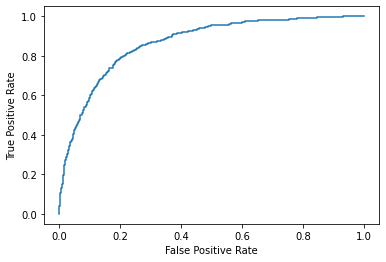

Feature Importance


In [127]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Model LogisticRegression using overfit
Scores
Accuracy score: 0.7942110836569009
RocAuc score: 0.8753683388775934
Confusion Matrix
[[ 722  156]
 [ 427 1528]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.91      0.78      0.84      1955
    landslide       0.63      0.82      0.71       878

     accuracy                           0.79      2833
    macro avg       0.77      0.80      0.78      2833
 weighted avg       0.82      0.79      0.80      2833

 Roc Curve


e:\PROGRAMS\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


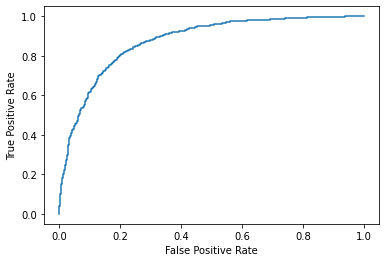

Feature Importance


In [128]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_res, y_train=y_res, X_test=X_test, y_test=y_test,using_oversample=True)

### Train With AdaBoostClassifer

In [129]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier( random_state=0)
model = "AdaBoost"


Model AdaBoost 
Scores
Accuracy score: 0.8535121779032827
RocAuc score: 0.9238448811236885
Confusion Matrix
[[ 675  203]
 [ 212 1743]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.90      0.89      0.89      1955
    landslide       0.76      0.77      0.76       878

     accuracy                           0.85      2833
    macro avg       0.83      0.83      0.83      2833
 weighted avg       0.85      0.85      0.85      2833

 Roc Curve


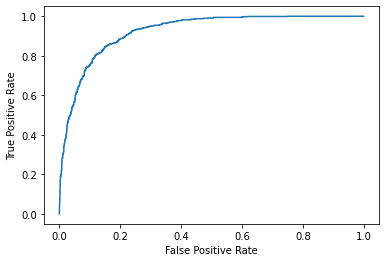

Feature Importance
	Place	Feature	%
	1	precipitation_mm_last_7_days	16.0
	2	soil_rec_symbol	10.0
	3	elevation_13	6.0
	4	rock_geo	6.0
	5	satellite	4.0
	6	soil_tax	4.0
	7	soil_rec_mat_origin	4.0
	8	fis_nomr	4.0
	9	rock_period	4.0
	10	elevation_6	2.0
	11	elevation_3	2.0
	12	elevation_24	2.0
	13	elevation_5	2.0
	14	elevation_10	2.0
	15	slope_6	2.0
	16	slope_13	2.0
	17	slope_4	2.0
	18	slope_10	2.0
	19	slope_25	2.0
	20	aspect_6	2.0
	21	placurv_7	2.0
	22	placurv_3	2.0
	23	placurv_13	2.0
	24	placurv_10	2.0
	25	procurv_21	2.0
	26	soil_rec_sew_class	2.0
	27	soil_rec_tex_sup	2.0
	28	soil_rec_tex_sub	2.0
	29	soil_use	2.0
	30	rock_type	2.0


In [130]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Model AdaBoost using overfit
Scores
Accuracy score: 0.8521002470878927
RocAuc score: 0.9304586685620073
Confusion Matrix
[[ 758  120]
 [ 299 1656]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.93      0.85      0.89      1955
    landslide       0.72      0.86      0.78       878

     accuracy                           0.85      2833
    macro avg       0.82      0.86      0.84      2833
 weighted avg       0.87      0.85      0.86      2833

 Roc Curve


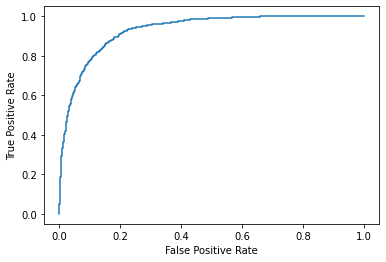

Feature Importance
	Place	Feature	%
	1	precipitation_mm_last_7_days	10.0
	2	soil_rec_symbol	10.0
	3	rock_geo	8.0
	4	elevation_24	4.0
	5	placurv_17	4.0
	6	satellite	4.0
	7	soil_rec_mat_origin	4.0
	8	soil_rec_tex_sub	4.0
	9	rock_period	4.0
	10	elevation_1	2.0
	11	elevation_3	2.0
	12	elevation_4	2.0
	13	elevation_10	2.0
	14	slope_21	2.0
	15	slope_13	2.0
	16	slope_18	2.0
	17	slope_5	2.0
	18	slope_25	2.0
	19	aspect_6	2.0
	20	placurv_21	2.0
	21	placurv_3	2.0
	22	placurv_9	2.0
	23	placurv_19	2.0
	24	placurv_10	2.0
	25	placurv_25	2.0
	26	procurv_6	2.0
	27	procurv_3	2.0
	28	procurv_25	2.0
	29	soil_tax	2.0
	30	soil_rec_sew_class	2.0
	31	soil_rec_tex_sup	2.0
	32	fis_nomr	2.0
	33	soil_use	2.0


In [131]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_res, y_train=y_res, X_test=X_test, y_test=y_test,using_oversample=True)

### Train With XGBoostClassifer

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
import xgboost as xgb
clf = xgb.XGBClassifier(random_state=0)
model = "XGBoost"


#### Train Test Method Not Using Oversample

[14:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model XGBoost 
Scores
Accuracy score: 0.8891634309918814
RocAuc score: 0.9447513384439643
Confusion Matrix
[[ 737  167]
 [ 147 1782]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.91      0.92      0.92      1929
    landslide       0.83      0.82      0.82       904

     accuracy                           0.89      2833
    macro avg       0.87      0.87      0.87      2833
 weighted avg       0.89      0.89      0.89      2833

 Roc Curve


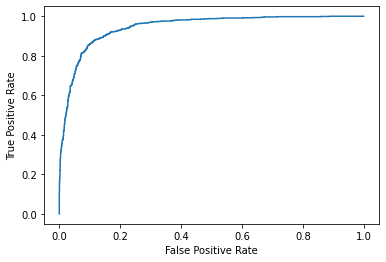

Feature Importance
	Place	Feature	%
	1	elevation_13	16.31
	2	precipitation_mm_last_7_days	10.02
	3	rock_geo	5.26
	4	soil_rec_risk_eros	5.17
	5	rock_period	4.96
	6	soil_rec_symbol	4.91
	7	soil_rec_tex_sup	4.69
	8	soil_rec_tex_sub	4.44
	9	soil_rec_mat_origin	4.41
	10	fis_nomr	4.41
	11	rock_type	4.38
	12	soil_rec_sew_class	4.31
	13	soil_tax	4.01
	14	soil_rec_c_tex_sup	3.92
	15	soil_use	3.87
	16	slope_13	3.5
	17	soil_rec_c__tex_sub	3.46
	18	placurv_13	2.92
	19	aspect_13	2.53
	20	procurv_13	2.53


(0.8891634309918814, 0.9447513384439643)

In [68]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


#### Train Test Method Using Oversample

[00:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model XGBoost using oversample
Scores
Accuracy score: 0.8655135898340981
RocAuc score: 0.9363355996274836
Confusion Matrix
[[ 810   94]
 [ 287 1642]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.95      0.85      0.90      1929
    landslide       0.74      0.90      0.81       904

     accuracy                           0.87      2833
    macro avg       0.84      0.87      0.85      2833
 weighted avg       0.88      0.87      0.87      2833

 Roc Curve


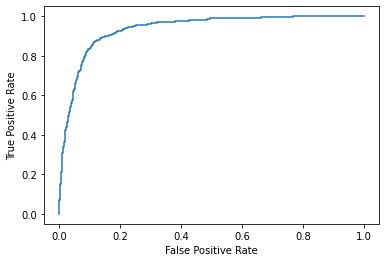

Feature Importance
	Place	Feature	%
	1	elevation_3	16.48
	2	elevation_23	9.68
	3	precipitation_mm_last_7_days	5.77
	4	elevation_18	4.7
	5	soil_rec_sew_class	3.77
	6	elevation_8	2.93
	7	soil_rec_tex_sub	2.88
	8	soil_tax	2.68
	9	soil_rec_tex_sup	2.65
	10	rock_type	2.29
	11	soil_rec_symbol	2.25
	12	fis_nomr	2.16
	13	soil_rec_mat_origin	2.1
	14	rock_geo	1.98
	15	slope_13	1.96
	16	soil_rec_risk_eros	1.95
	17	aspect_13	1.89
	18	placurv_13	1.89
	19	soil_rec_c_tex_sup	1.88
	20	elevation_13	1.86
	21	aspect_3	1.74
	22	placurv_23	1.73
	23	soil_use	1.56
	24	procurv_23	1.49
	25	slope_3	1.48
	26	placurv_8	1.46
	27	procurv_8	1.44
	28	placurv_3	1.4
	29	procurv_3	1.35
	30	soil_rec_c__tex_sub	1.35
	31	procurv_18	1.34
	32	procurv_13	1.33
	33	slope_23	1.3
	34	aspect_18	1.28
	35	slope_8	1.27
	36	placurv_18	1.27
	37	slope_18	1.24
	38	aspect_8	1.12
	39	aspect_23	1.12


(0.8655135898340981, 0.9363355996274836)

In [51]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_res, y_train=y_res, X_test=X_test, y_test=y_test,using_oversample=True)

#### Cross Validation Method Not Using Oversample

In [ ]:
# Train using Cross validation not using oversample
train_with_model_cross_validation_method(clf=clf,model=model,training_df=training,features=features,using_oversample=False)

#### Cross Validation Method  Using Oversample

In [53]:
# Train using Cross validation using oversample
train_with_model_cross_validation_method(clf=clf,model=model,training_df=training,features=features,using_oversample=True)

Model XGBoost using oversample
Cross Validation
[00:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:26:52] WARNING: C:

#### Tune Parameters

In [73]:
import xgboost as xgb
clf = xgb.XGBClassifier(random_state=0, learning_rate=0.001,eval_metric='error')
model = "XGBoost"

[00:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model XGBoost using oversample
Scores
Accuracy score: 0.8750441228379809
RocAuc score: 0.9376620010368066
Confusion Matrix
[[ 723  181]
 [ 173 1756]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.91      0.91      0.91      1929
    landslide       0.81      0.80      0.80       904

     accuracy                           0.88      2833
    macro avg       0.86      0.86      0.86      2833
 weighted avg       0.87      0.88      0.87      2833

 Roc Curve


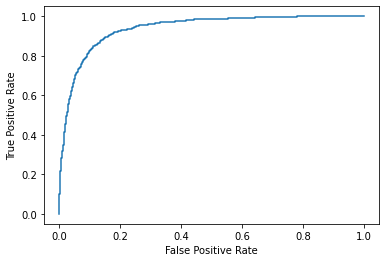

Feature Importance
	Place	Feature	%
	1	elevation_18	12.01
	2	elevation_3	12.0
	3	elevation_23	8.37
	4	elevation_13	7.3
	5	precipitation_mm_last_7_days	5.61
	6	elevation_8	2.87
	7	soil_rec_symbol	2.52
	8	soil_rec_sew_class	2.49
	9	fis_nomr	2.45
	10	soil_rec_tex_sub	2.3
	11	slope_13	2.19
	12	soil_rec_mat_origin	2.19
	13	rock_geo	2.15
	14	soil_use	2.09
	15	rock_type	2.06
	16	soil_tax	2.04
	17	soil_rec_tex_sup	2.0
	18	soil_rec_risk_eros	1.85
	19	placurv_13	1.76
	20	placurv_23	1.56
	21	aspect_3	1.54
	22	aspect_13	1.39
	23	procurv_18	1.31
	24	soil_rec_c_tex_sup	1.3
	25	slope_23	1.26
	26	slope_18	1.2
	27	slope_8	1.17
	28	aspect_8	1.16
	29	aspect_18	1.14
	30	slope_3	1.13
	31	placurv_3	1.13
	32	procurv_23	1.13
	33	placurv_18	1.12
	34	placurv_8	1.11
	35	procurv_13	1.07
	36	procurv_8	1.03
	37	soil_rec_c__tex_sub	1.02
	38	procurv_3	1.01
	39	aspect_23	0.97


(0.8750441228379809, 0.9376620010368066)

In [54]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,using_oversample=True)

### Train With SVMClassifier

In [55]:
from sklearn import svm
clf = svm.SVC(random_state=0,probability=True)
model = "SVM"


Model SVM 
Scores
Accuracy score: 0.7839745852453229
RocAuc score: 0.7945416832968616
Confusion Matrix
[[ 602  302]
 [ 310 1619]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.84      0.84      0.84      1929
    landslide       0.66      0.67      0.66       904

     accuracy                           0.78      2833
    macro avg       0.75      0.75      0.75      2833
 weighted avg       0.78      0.78      0.78      2833

 Roc Curve


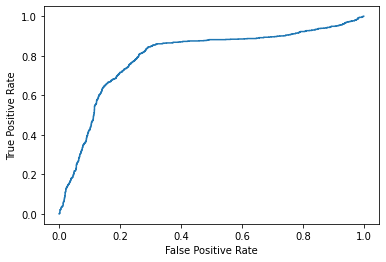

Feature Importance


(0.7839745852453229, 0.7945416832968616)

In [56]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Model SVM using oversample
Scores
Accuracy score: 0.753618072714437
RocAuc score: 0.8409023658459379
Confusion Matrix
[[ 737  167]
 [ 531 1398]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.89      0.72      0.80      1929
    landslide       0.58      0.82      0.68       904

     accuracy                           0.75      2833
    macro avg       0.74      0.77      0.74      2833
 weighted avg       0.79      0.75      0.76      2833

 Roc Curve


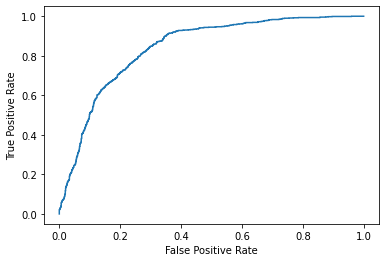

Feature Importance


(0.753618072714437, 0.8409023658459379)

In [57]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_res, y_train=y_res, X_test=X_test, y_test=y_test,using_oversample=True)

### Train With Neural Networks

In [151]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
    hidden_layer_sizes=(20), random_state=0)
model = "NeuralNetworksMLPClassifier"


Model NeuralNetworksMLPClassifier 
Scores
Accuracy score: 0.815037063183904
RocAuc score: 0.8742055007602725
Confusion Matrix
[[ 624  254]
 [ 270 1685]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.87      0.86      0.87      1955
    landslide       0.70      0.71      0.70       878

     accuracy                           0.82      2833
    macro avg       0.78      0.79      0.78      2833
 weighted avg       0.82      0.82      0.82      2833

 Roc Curve


e:\PROGRAMS\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


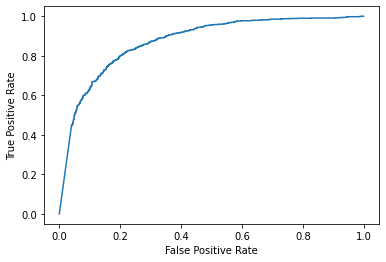

Feature Importance


In [152]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Model NeuralNetworksMLPClassifier using overfit
Scores
Accuracy score: 0.740557712672079
RocAuc score: 0.8302314607134327
Confusion Matrix
[[ 742  136]
 [ 599 1356]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.91      0.69      0.79      1955
    landslide       0.55      0.85      0.67       878

     accuracy                           0.74      2833
    macro avg       0.73      0.77      0.73      2833
 weighted avg       0.80      0.74      0.75      2833

 Roc Curve


e:\PROGRAMS\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


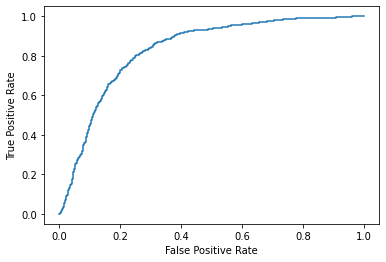

Feature Importance


In [153]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_res, y_train=y_res, X_test=X_test, y_test=y_test,using_oversample=True)

### Train With Bagging Classifer

In [154]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(
                      n_estimators=10, random_state=0)
model = "BaggingClasssifer"


Model BaggingClasssifer 
Scores
Accuracy score: 0.8566890222379103
RocAuc score: 0.9127017926116667
Confusion Matrix
[[ 632  246]
 [ 160 1795]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.88      0.92      0.90      1955
    landslide       0.80      0.72      0.76       878

     accuracy                           0.86      2833
    macro avg       0.84      0.82      0.83      2833
 weighted avg       0.85      0.86      0.85      2833

 Roc Curve


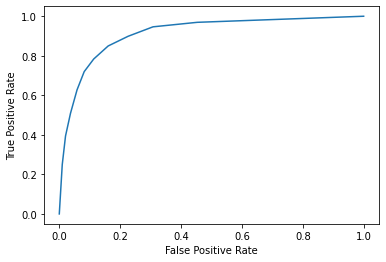

Feature Importance


In [155]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Model BaggingClasssifer using overfit
Scores
Accuracy score: 0.9488175079421108
RocAuc score: 0.9833270220042063
Confusion Matrix
[[ 795   83]
 [  62 1893]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.96      0.97      0.96      1955
    landslide       0.93      0.91      0.92       878

     accuracy                           0.95      2833
    macro avg       0.94      0.94      0.94      2833
 weighted avg       0.95      0.95      0.95      2833

 Roc Curve


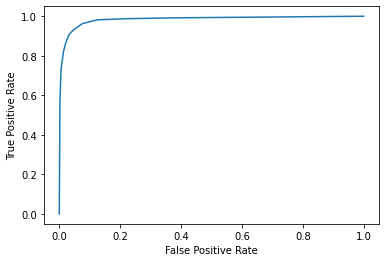

Feature Importance


In [156]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_res, y_train=y_res, X_test=X_test, y_test=y_test,using_oversample=True)

### Train With Naive Bayer Classifer

In [157]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
model = "NaiveBayer"


Model NaiveBayer 
Scores
Accuracy score: 0.7571478997529121
RocAuc score: 0.8177717318481321
Confusion Matrix
[[ 640  238]
 [ 450 1505]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.86      0.77      0.81      1955
    landslide       0.59      0.73      0.65       878

     accuracy                           0.76      2833
    macro avg       0.73      0.75      0.73      2833
 weighted avg       0.78      0.76      0.76      2833

 Roc Curve


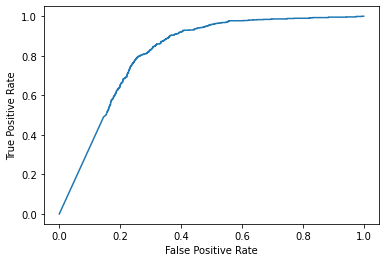

Feature Importance


In [158]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Model NaiveBayer using overfit
Scores
Accuracy score: 0.7606777267913872
RocAuc score: 0.8175523888866232
Confusion Matrix
[[ 651  227]
 [ 451 1504]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.87      0.77      0.82      1955
    landslide       0.59      0.74      0.66       878

     accuracy                           0.76      2833
    macro avg       0.73      0.76      0.74      2833
 weighted avg       0.78      0.76      0.77      2833

 Roc Curve


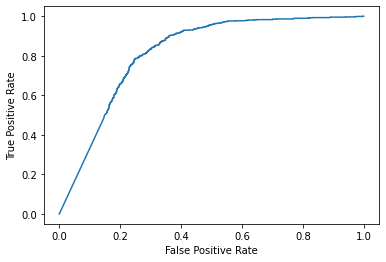

Feature Importance


In [159]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf,model=model,X_train=X_res, y_train=y_res, X_test=X_test, y_test=y_test,using_oversample=True)